<a href="https://colab.research.google.com/github/Rohan171819/Deep_Learning./blob/main/Early_Stopping_in_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
Data=pd.DataFrame([[8,8,1],[7,9,1],[6,10,0],[5,5,0]],columns=["iq","resume_score","placement"])
Data

,iq,resume_score,placement
0,8,8,1
1,7,9,1
2,6,10,0
3,5,5,0


In [3]:
X=Data[["iq","resume_score"]]
Y=Data[["placement"]]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,test_size=0.2,random_state=10)

In [10]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense

In [5]:
# Creating the Architecture...
model=Sequential()
model.add(Dense(3,activation="sigmoid",input_dim=2))
model.add(Dense(1,activation="sigmoid"))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 9         
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [7]:
optimizer=keras.optimizers.Adam(learning_rate=0.0001)

In [14]:
callback=EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=10,
    verbose=True,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0
)

In [15]:
# Compiling the Model...
model.compile(loss="binary_crossentropy",optimizer=optimizer,metrics=['accuracy'])

In [16]:
# Training my model...
history=model.fit(X_train,Y_train,epochs=500,validation_split=0.2,callbacks=callback)

Epoch 1/500
1/1 [==============================] - 6s 6s/step - loss: 0.7063 - accuracy: 0.5000 - val_loss: 0.5617 - val_accuracy: 1.0000
Epoch 2/500
1/1 [==============================] - 0s 33ms/step - loss: 0.7062 - accuracy: 0.5000 - val_loss: 0.5618 - val_accuracy: 1.0000
Epoch 3/500
1/1 [==============================] - 0s 37ms/step - loss: 0.7062 - accuracy: 0.5000 - val_loss: 0.5619 - val_accuracy: 1.0000
Epoch 4/500
1/1 [==============================] - 0s 34ms/step - loss: 0.7062 - accuracy: 0.5000 - val_loss: 0.5620 - val_accuracy: 1.0000
Epoch 5/500
1/1 [==============================] - 0s 33ms/step - loss: 0.7062 - accuracy: 0.5000 - val_loss: 0.5621 - val_accuracy: 1.0000
Epoch 6/500
1/1 [==============================] - 0s 50ms/step - loss: 0.7062 - accuracy: 0.5000 - val_loss: 0.5622 - val_accuracy: 1.0000
Epoch 7/500
1/1 [==============================] - 0s 29ms/step - loss: 0.7061 - accuracy: 0.5000 - val_loss: 0.5623 - val_accuracy: 1.0000
Epoch 8/500
1/1 [=====

In [17]:
Y_predicted=model.predict(X_test)

1/1 [==============================] - 0s 65ms/step


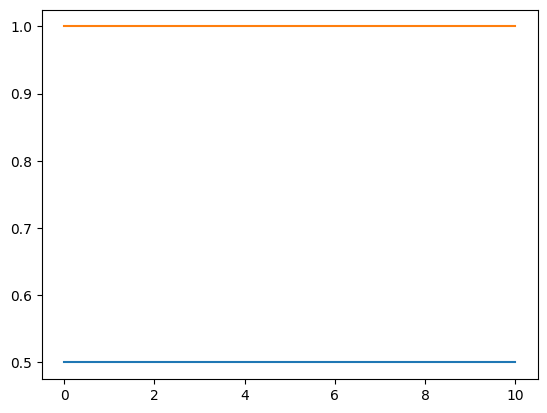

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()

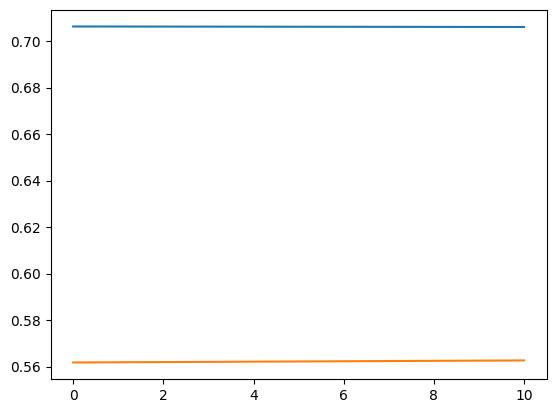

In [19]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()